# A guide to SatFitter

## <a id="start"></a>Sections
\
<font size="3">
    
[Visualizing the data](#visual)

[Fitting the image](#functions)
    
[Visualizing the results](#results)

[Automation](#auto)

## <a id="visual"></a>Visualizing the data

The visual_methods and functions codes import functions to visualize fits data and to generate the resources to be later used to fit the data. The function $\tt{open_{-}fits_{-}image}$ can be used to retrieve the data array and grid and, if the parameter "show" is set to True, plots the data in a 2D image.


In [1]:
from visual_methods import *
from functions import *
from automation import *
%matplotlib notebook

<IPython.core.display.Javascript object>


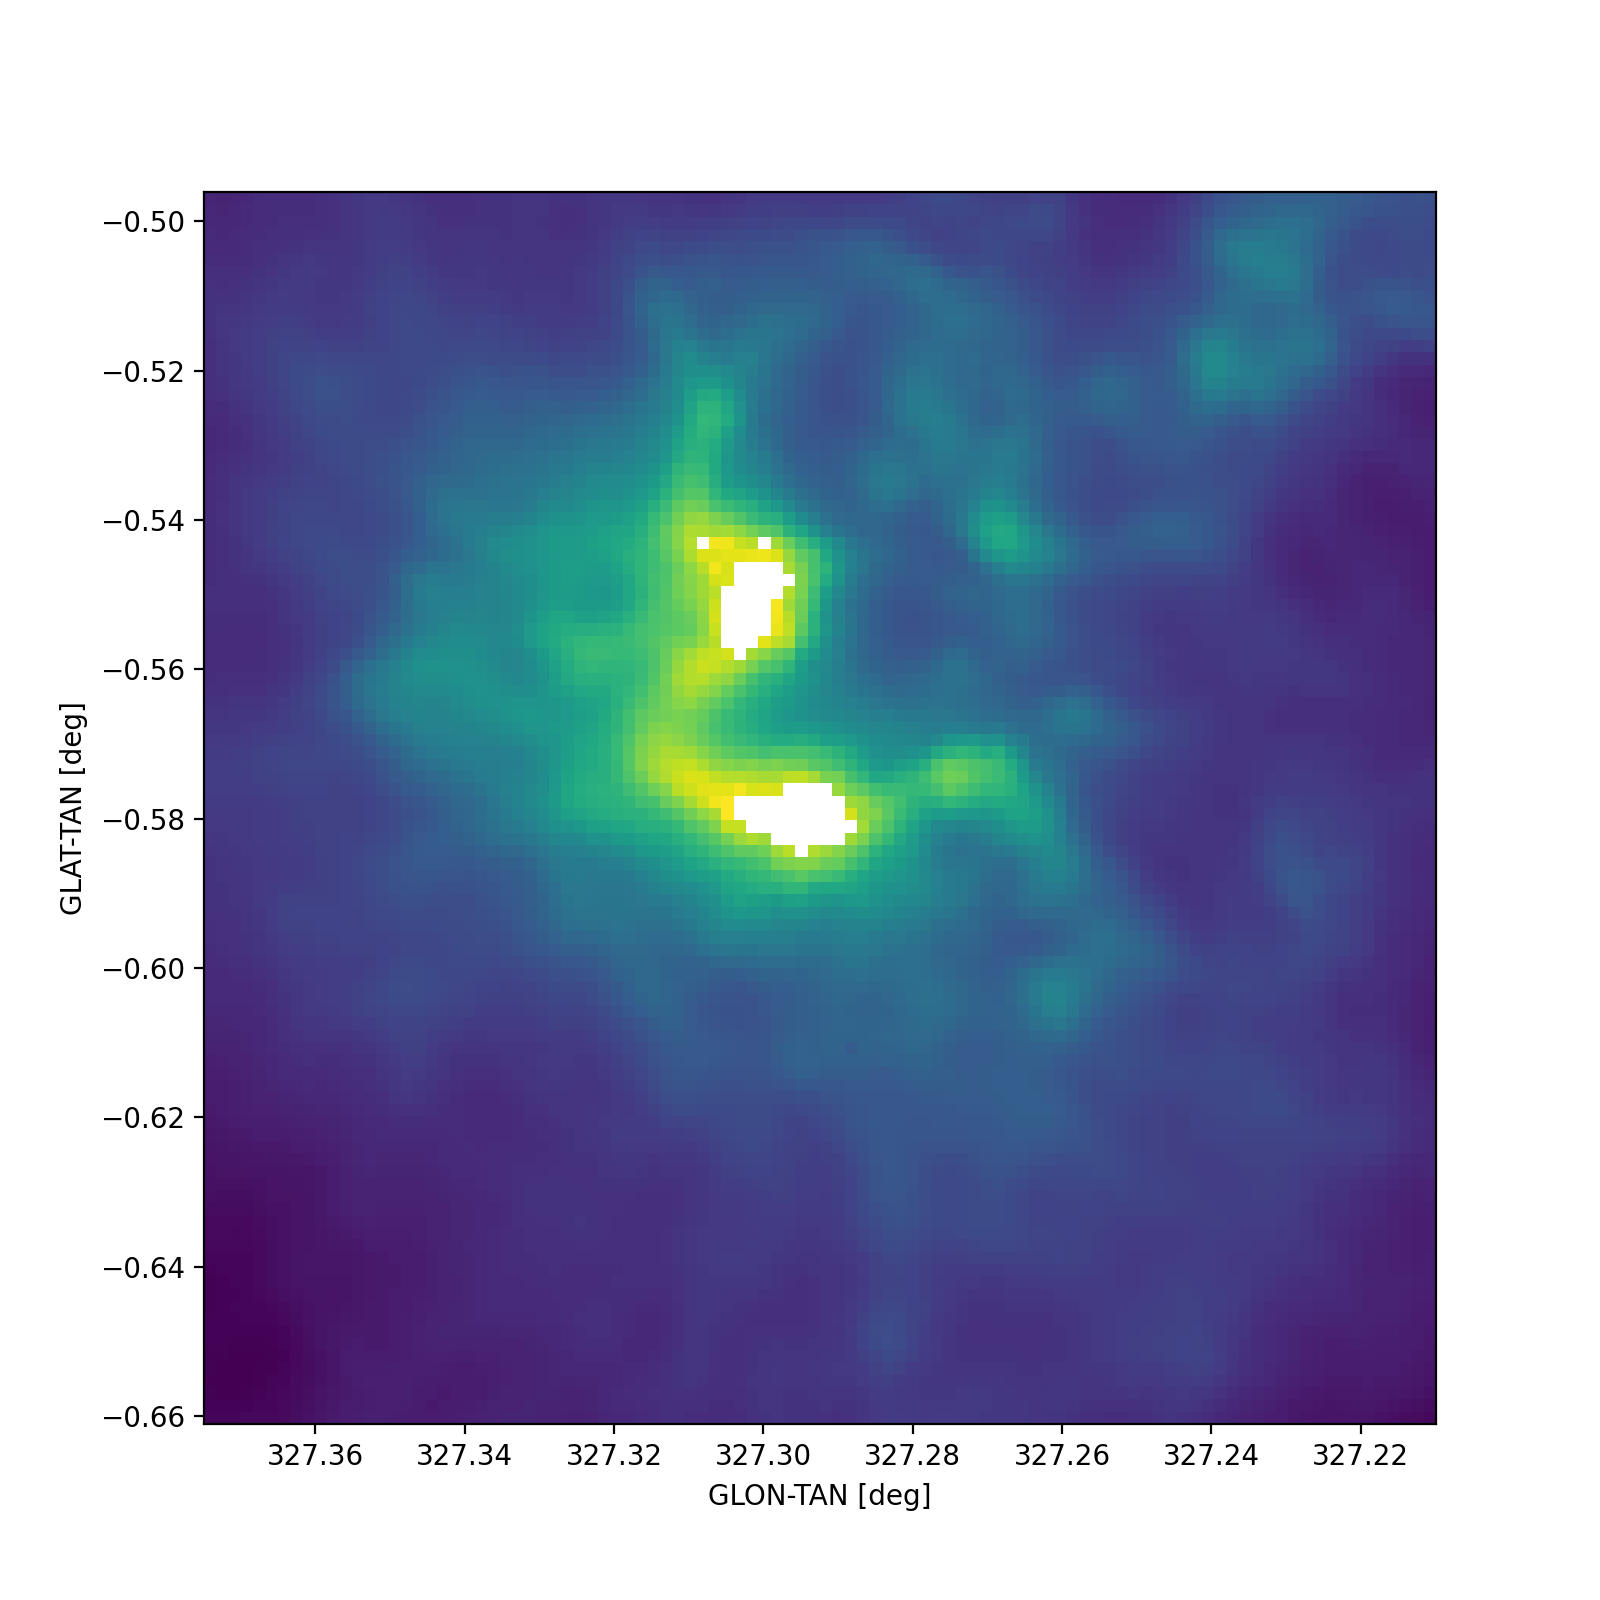

In [2]:
path = 'Data/'
info = 'sat21sources.fits'
file = 'SAT250_21.fits'

data,grid = open_fits_image(path+file,show=True)
xl,xr,yb,yt = grid_lims(grid)

The function $\tt{open_{-}fits_{-}table}$ reads the table containing the sources information, converting it into a pandas table.

From the table we can extract the information needed, more specifically the sources positions, angles and FWHM values respectively.

In [3]:
# extracting sources informations

df = open_fits_table(path+info)

mu_vals,theta_vals,FWHM_vals = get_parameters(df,'galactic')
print(mu_vals,'\n\n',theta_vals,'\n\n',FWHM_vals)

df

[[327.29218148  -0.57925367]
 [327.29700548  -0.54403258]
 [327.30055417  -0.55094705]
 [327.3038779   -0.57759332]
 [327.30618586  -0.54224532]
 [327.30868166  -0.55967685]
 [327.3104036   -0.55035597]
 [327.31192217  -0.57280958]] 

 [  0. 144.  63. 147.  14. 101.  76. 100.] 

 [[25. 22.]
 [29. 19.]
 [38. 28.]
 [50. 22.]
 [32. 31.]
 [24. 20.]
 [32. 19.]
 [30. 20.]]


,Seq,Name,RAJ2000,DEJ2000,amaj,amin,PA,FWHM,Sp,Sint,S_N
0,916,G327.2921-0.5792,238.2851,-54.6191,25,22,0,23,49.21,71.17,243.25
1,918,G327.2970-0.5440,238.2530,-54.5888,29,19,144,24,2.35,3.53,19.67
2,919,G327.3005-0.5509,238.2653,-54.5919,38,28,63,33,11.26,32.27,88.00
3,920,G327.3039-0.5775,238.2989,-54.6104,50,22,147,33,7.14,21.32,58.15
4,922,G327.3062-0.5422,238.2633,-54.5816,32,31,14,31,3.51,9.43,33.92
5,923,G327.3087-0.5596,238.2857,-54.5935,24,20,101,22,1.96,2.55,17.33
6,924,G327.3104-0.5503,238.2778,-54.5852,32,19,76,25,0.83,1.39,9.02
7,925,G327.3119-0.5727,238.3044,-54.6016,30,20,100,24,1.20,1.91,12.58


## <a id="functions"></a>Fitting the image

Using the $\tt{fitter}$ function you can fit the data array using gaussian sources. The only necessary inputs are the data array and the grid, however if nothing else is provided the function will assume it is fitting 1 source, as well as several other parameters. For more complex cases it is crucial to provide additional information. Here we will use the input from the table to fit 8 sources to the image, only taking into consideration the area that is within 2 times the FWHM of each source. The background value here will be determined using the histogram method. 

The function returns the resulting fixed 2D array, the fitted sources parameters and the estimated background value.

Note that some of the provided sources are in the unsaturated region, this is so that the code considers these sources when fitting the saturated regions, otherwise the flux from these may interfere with the results.

A more detailed review of the fitter function is done in the "Example_Notebook_Fitter.ipynb" notebook.

In [4]:
# Fitting the image

image,params,bg = fitter(data, grid, peaks=8,
                         mu=mu_vals, theta=theta_vals, FWHM=FWHM_vals,
                         fitting_radius=2, bg_method='hist', var_pos=0.001)

## <a id="results"></a>Visualizing the results

The results for each fit can be viewed using the functions $\tt{results_{-}plot}$ and $\tt{sweep_{-}fit}$.

$\tt{results_{-}plot}$ takes in the original grid and data, the resulting image, parameters and background returned by the $\tt{fitter}$, inputted position, FWHM values as well as the fitting radius and background method used in the $\tt{fitter}$, returning 4 plots: 

$\;\;\;\;\;\;\bullet$ Top-Left: The original image with inputted source positions and area considered for fit;

$\;\;\;\;\;\;\bullet$ Top-Right: The fixel image with inputted source positions and resulting positions;

$\;\;\;\;\;\;\bullet$ Bottom-Left: A plot of the fitted gaussians on a constant estimated background;

$\;\;\;\;\;\;\bullet$ Bottom-Right:The residuals between the original image and resulting image.

$\tt{sweep_{-}fit}$ takes in the original grid and data as well as the resulting parameters and background, returning 3 animated plots: 

$\;\;\;\;\;\;\bullet$ Left: original image with a red horizontal line indicating the row being read;

$\;\;\;\;\;\;\bullet$ Top-Right: Flux vs Longitude plot of the data and the fit in linear scale;

$\;\;\;\;\;\;\bullet$ Top-Left: Flux vs Longitude plot of the data and the fit in logarithmic scale;

Note that the function can be called without specifying the inputted position, FWHM, fitting radius and background method, however the results plots will represent certain aspects incorrectly (more specifically the contour area in graph 1 and the input position markers) as it will be assumed no input was given to the $\tt{fitter}$ function and thus the default values will be used.

<IPython.core.display.Javascript object>


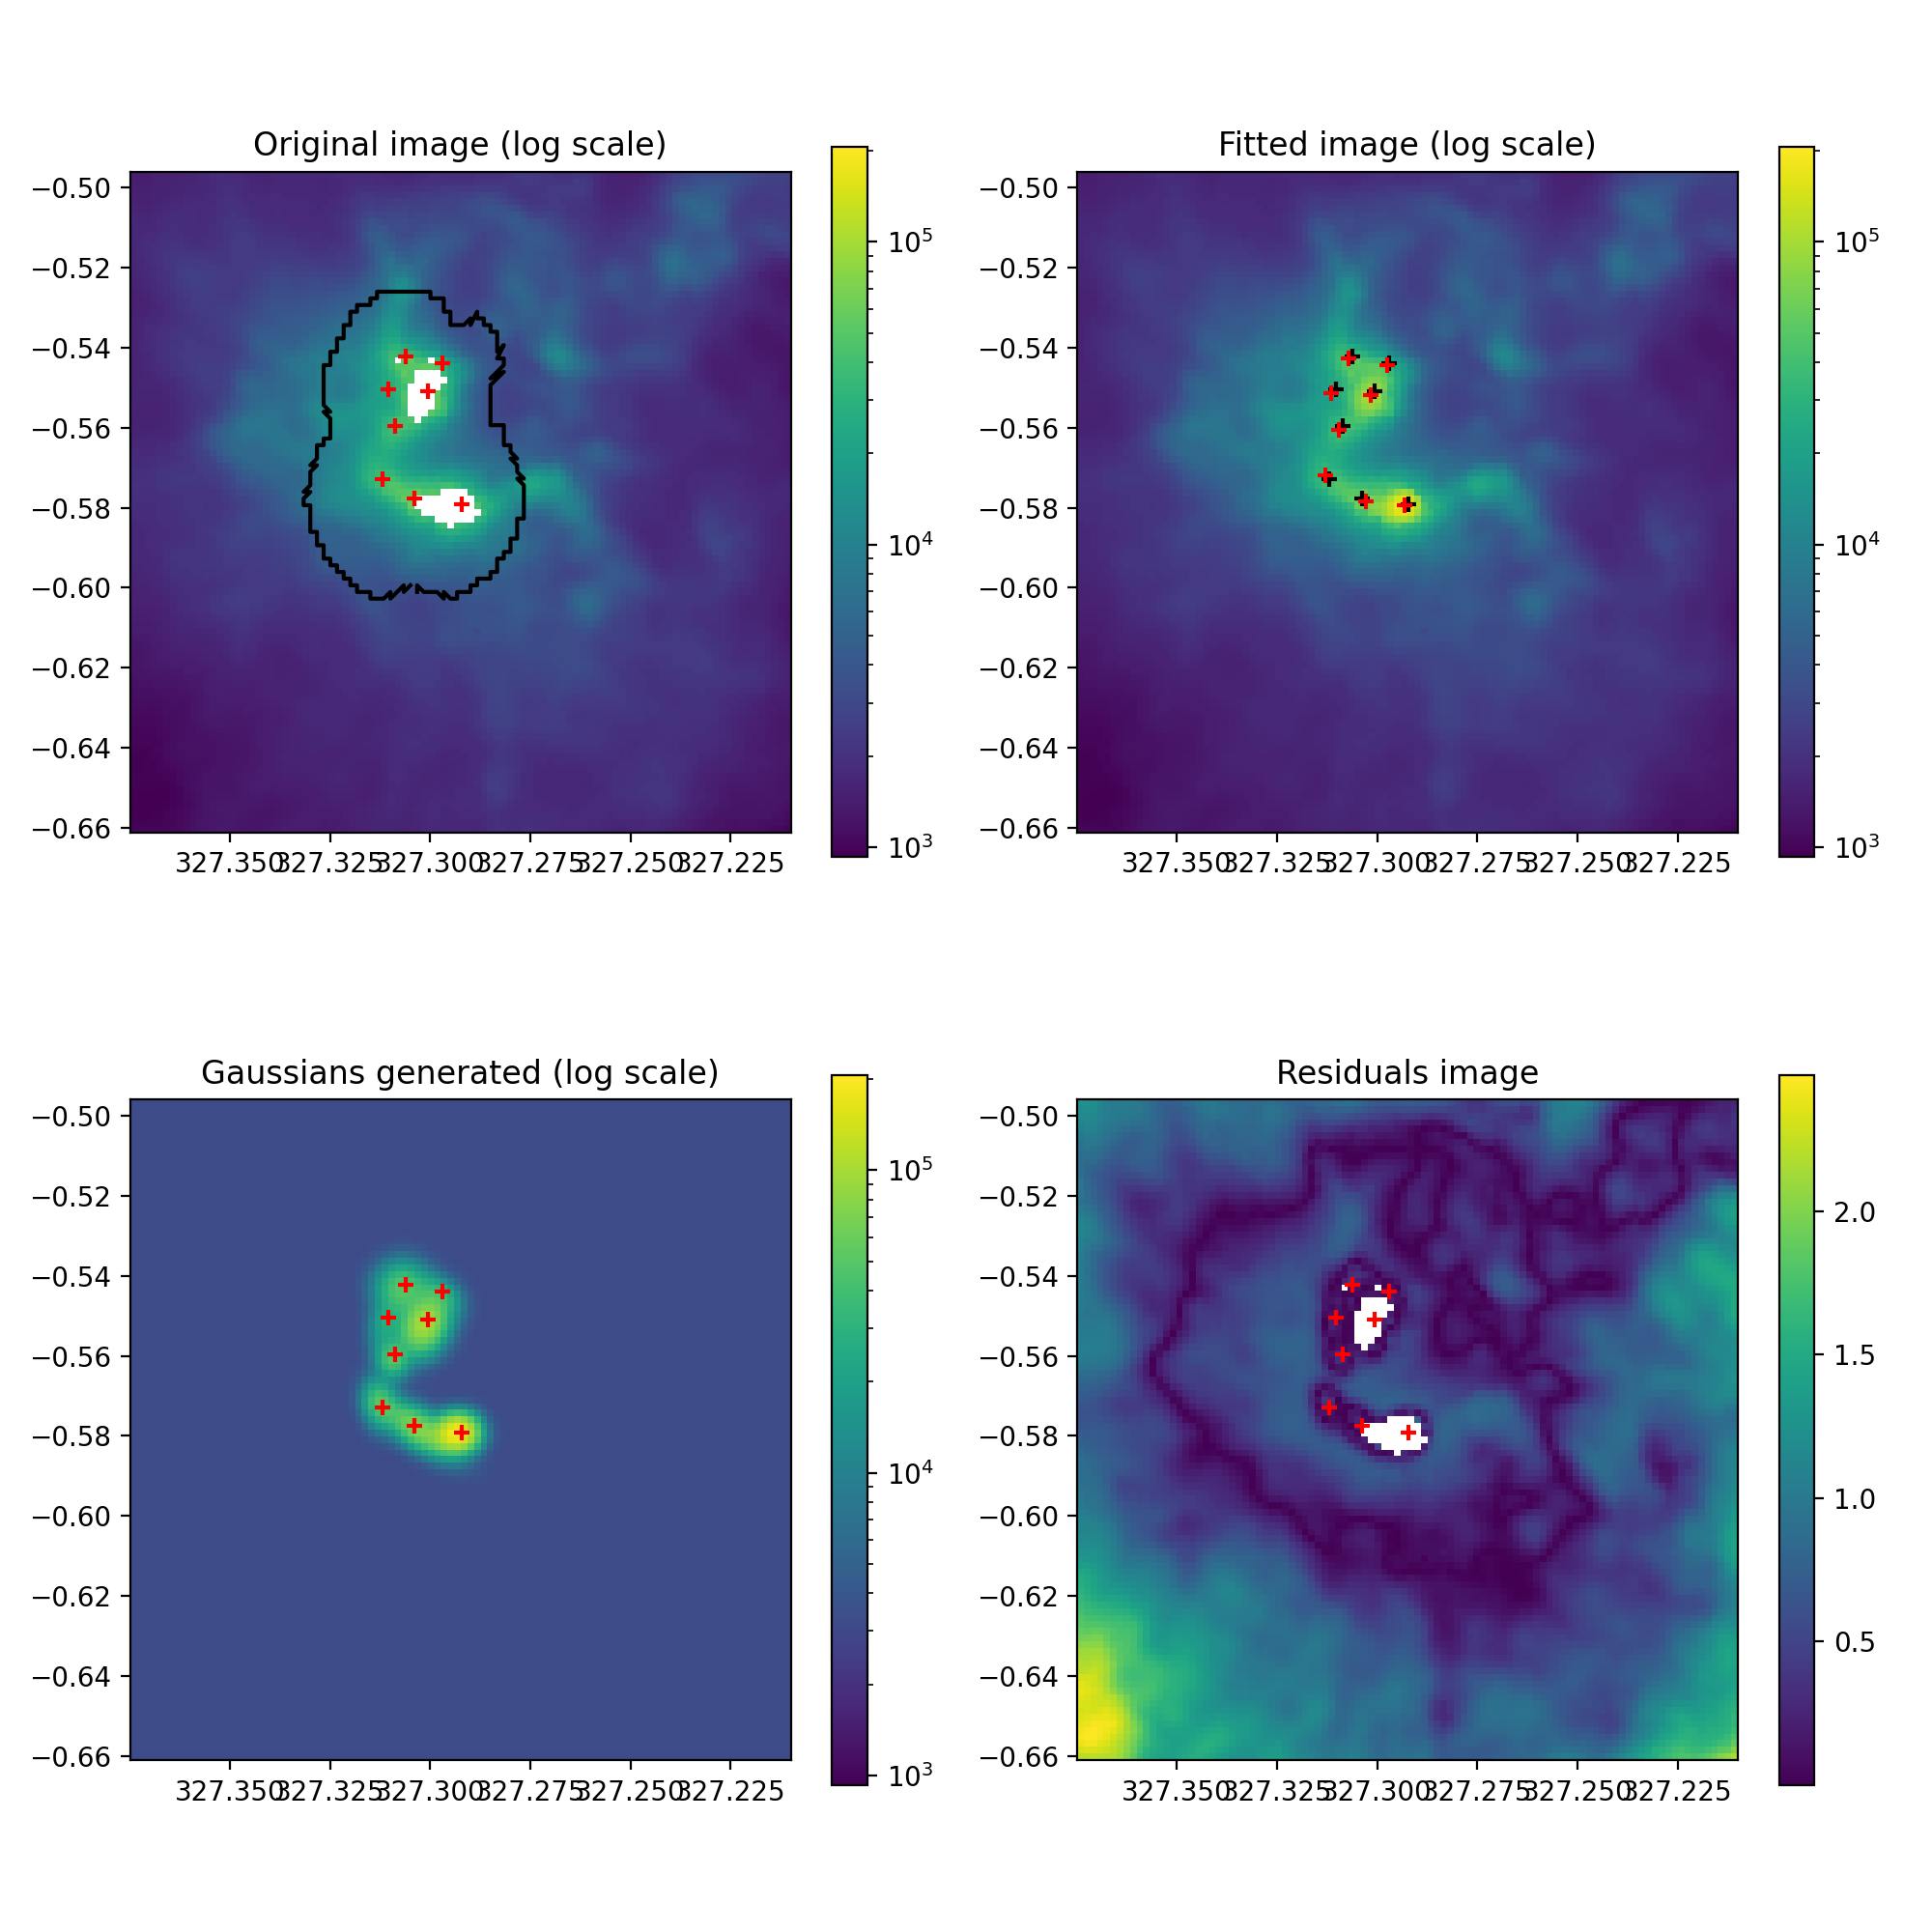

In [5]:
# Plotting the results 

results_plot(data, grid, image, params, bg, mu_vals, FWHM_vals, fitting_radius=2, bg_method='hist')

<IPython.core.display.Javascript object>


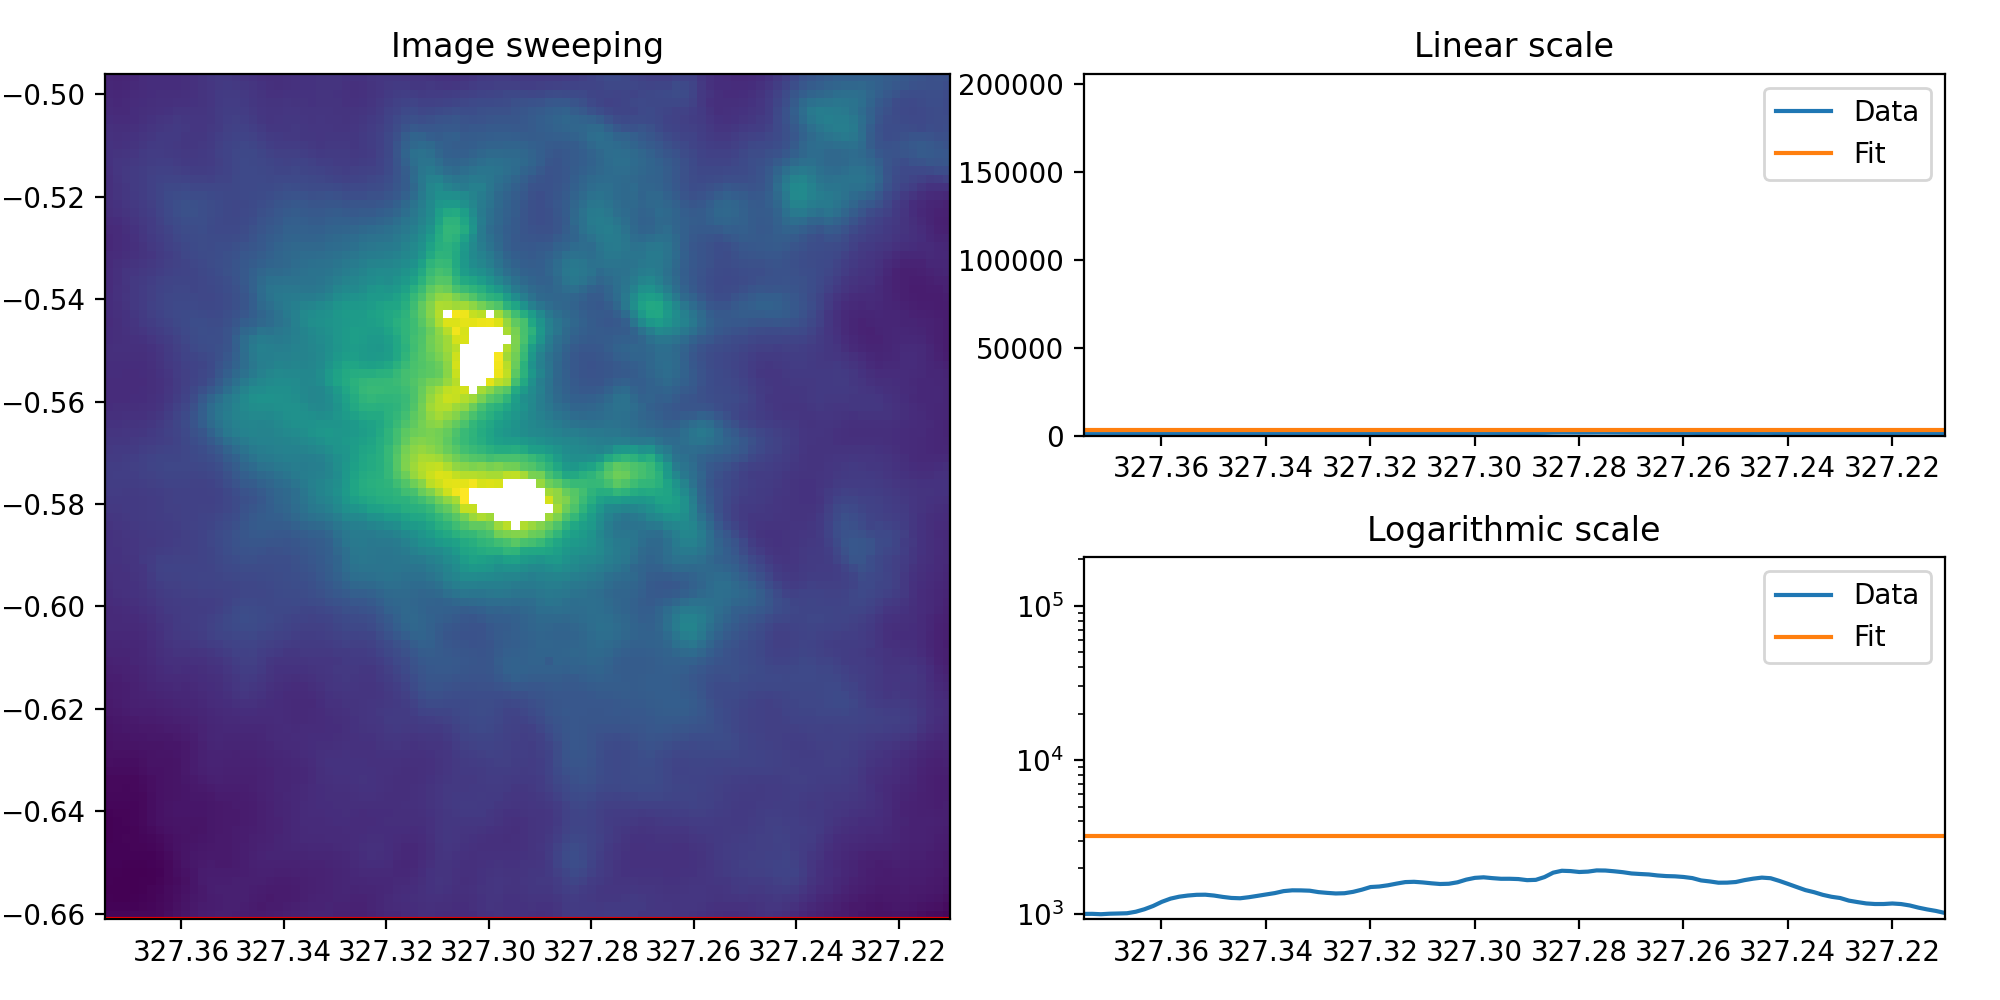

In [6]:
sweep_fit(grid,data,params,bg)

## <a id="auto"></a>Automation

The automation function allows for a fast and simple application on multiple files. The function should be provided with a single table with the source info for every image (they do not need to be ordered), a list containing all file names to be analysed, the path to the data and table, the path where the fixed images will be saved and the wavelength of the data (in case multiple wavelength values of FWHM are provided in the table, such as [amaj250, amin250, amaj160, amin160,...], which is not our case). 

The argument "show" can also be set to True, in which case the function will plot the fixed images in logarithmic scale. 

Other arguments for the $\tt{fitter}$ function, such as position and FWHM variation intervals, can be provided after the above mentioned.

<IPython.core.display.Javascript object>


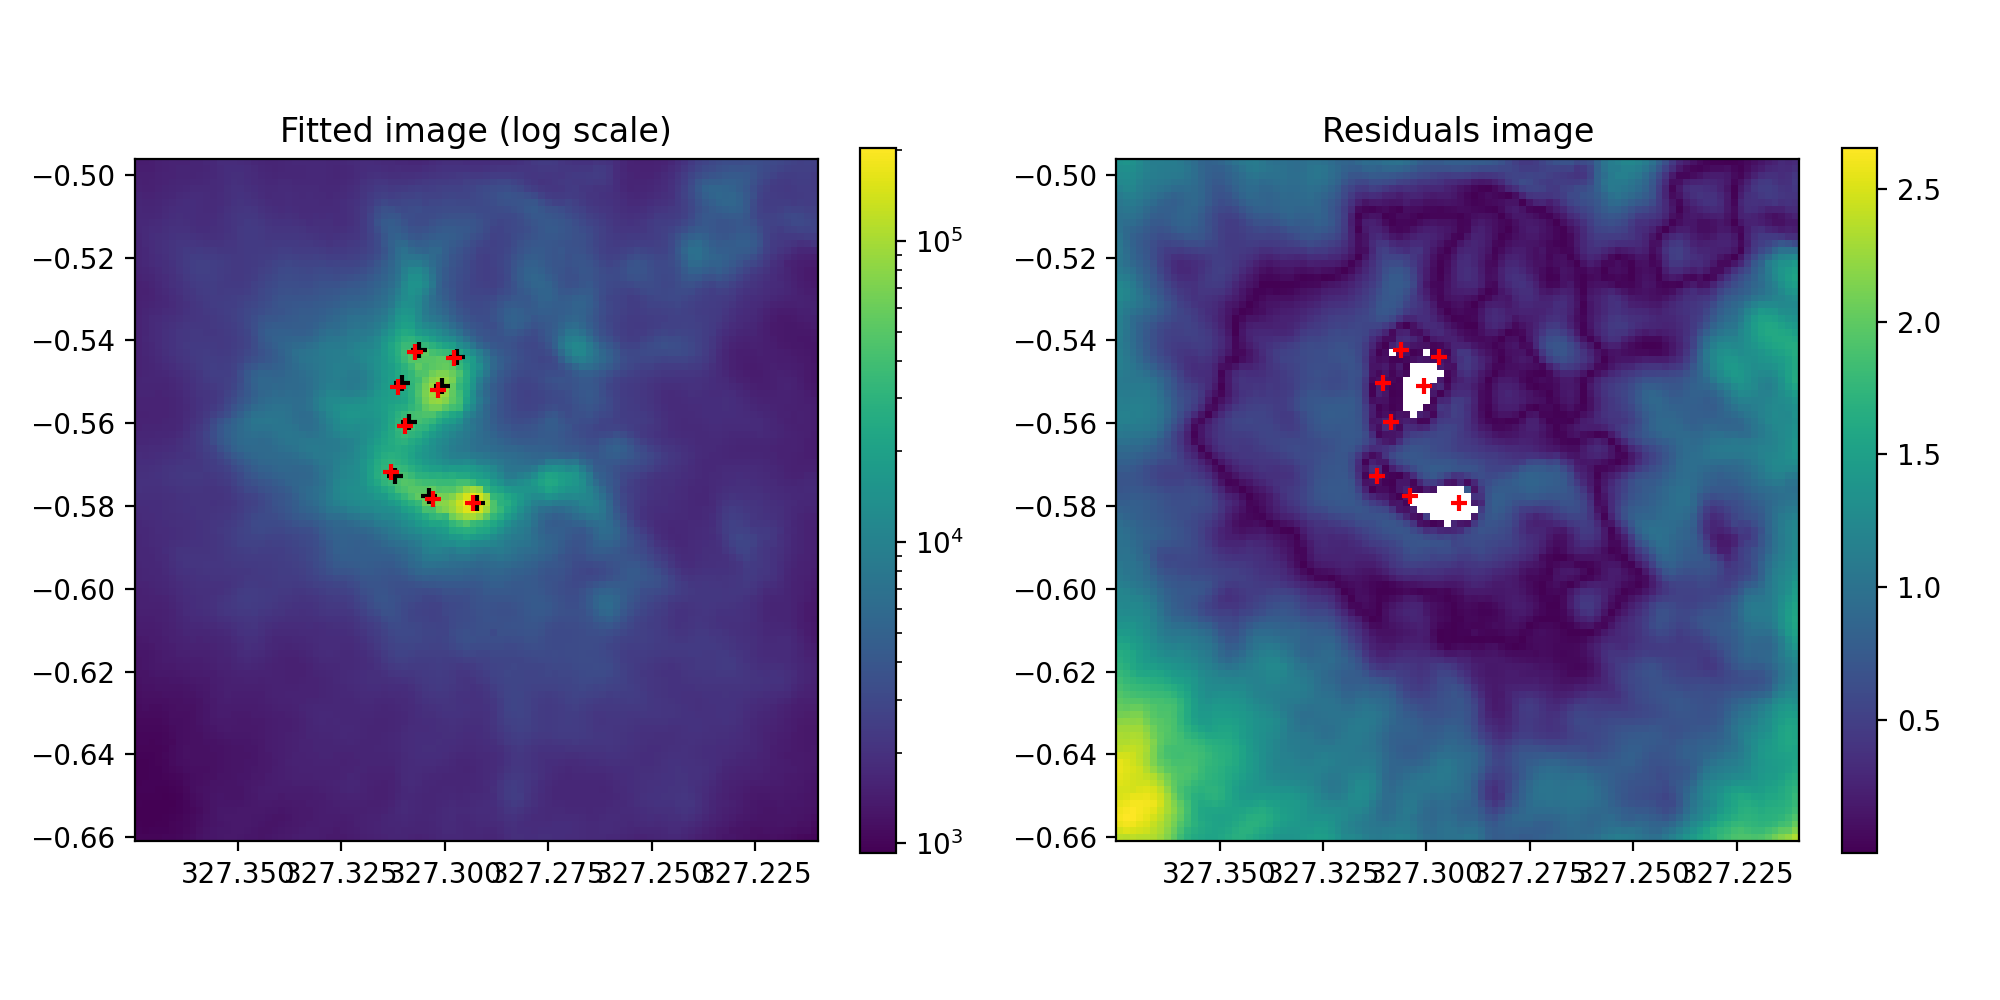

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [7]:
path = 'Data/'
save_path = 'Fixed/'
info = 'sat21sources.fits'
file_list = ['SAT250_21.fits']

fixed_files = automation(info, file_list, path=path, save_path=save_path, show=True, var_pos=0.001, fitting_radius=3)